In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.shape

(3999, 12)

In [4]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data.dtypes

,0
ID#,int64
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64


In [7]:
data.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.dtypes

,0
ID#,int64
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64


In [11]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

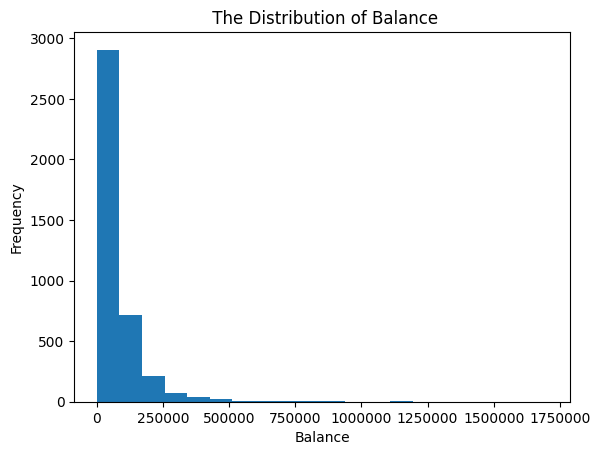

In [12]:
plt.hist(data['Balance'],bins = 20);
plt.ticklabel_format(style='plain')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title(" The Distribution of Balance")
plt.show()

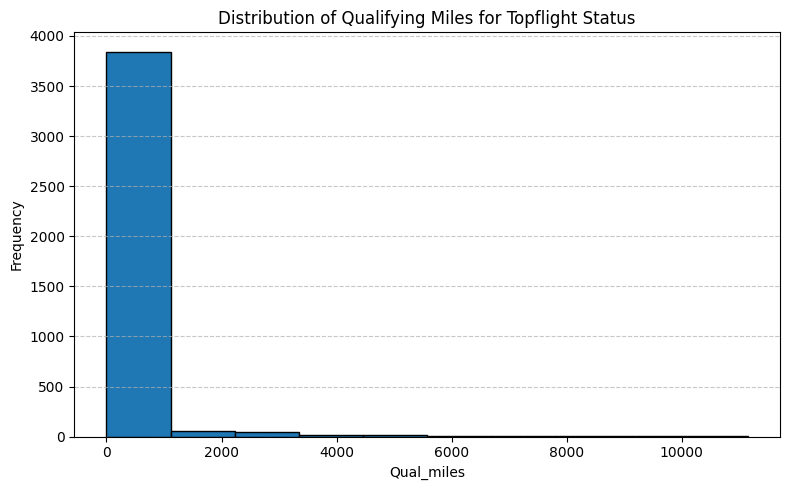

In [13]:
column = 'Qual_miles'

plt.figure(figsize=(8, 5))
data[column].plot(kind='hist', bins=10, edgecolor='black')
plt.title("Distribution of Qualifying Miles for Topflight Status")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

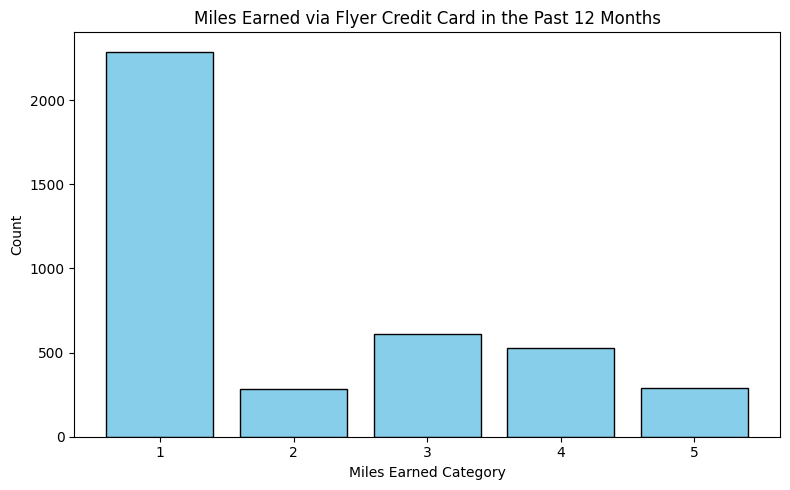

In [14]:
miles_data = data['cc1_miles'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(miles_data.index, miles_data.values, color='skyblue', edgecolor='black')
ax.set_title('Miles Earned via Flyer Credit Card in the Past 12 Months')
ax.set_xlabel('Miles Earned Category')
ax.set_ylabel('Count')
ax.set_xticks(miles_data.index)
ax.set_xticklabels(miles_data.index, rotation=0)
plt.tight_layout()
plt.show()


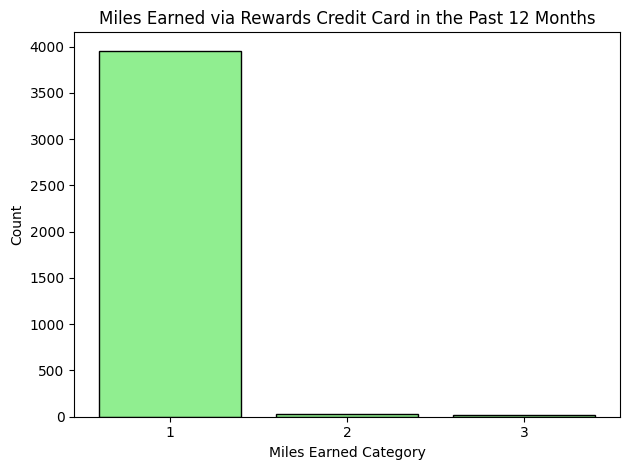

In [15]:
cc2_counts = data.groupby('cc2_miles').size().sort_index()

plt.bar(x=cc2_counts.index, height=cc2_counts.values, color='lightgreen', edgecolor='black')
plt.title('Miles Earned via Rewards Credit Card in the Past 12 Months')
plt.xlabel('Miles Earned Category')
plt.ylabel('Count')
plt.xticks(ticks=cc2_counts.index, rotation=0)
plt.tight_layout()
plt.show()

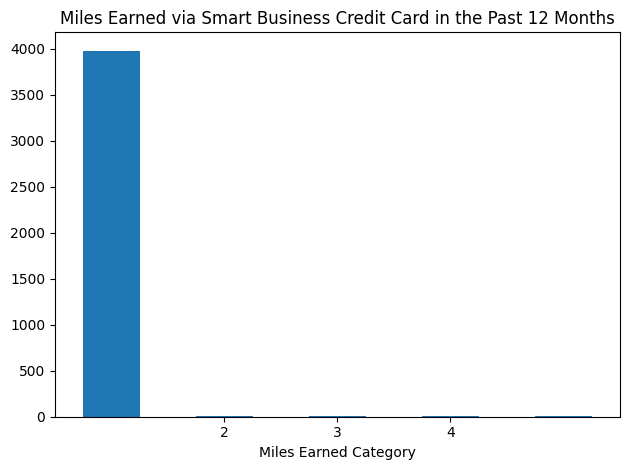

In [16]:
data['cc3_miles'].value_counts().sort_index().plot(kind='bar')
plt.title('Miles Earned via Smart Business Credit Card in the Past 12 Months')
plt.xlabel('Miles Earned Category')
plt.xticks(rotation=0);
plt.xticks(ticks=cc2_counts.index, rotation=0)
plt.tight_layout()
plt.show()

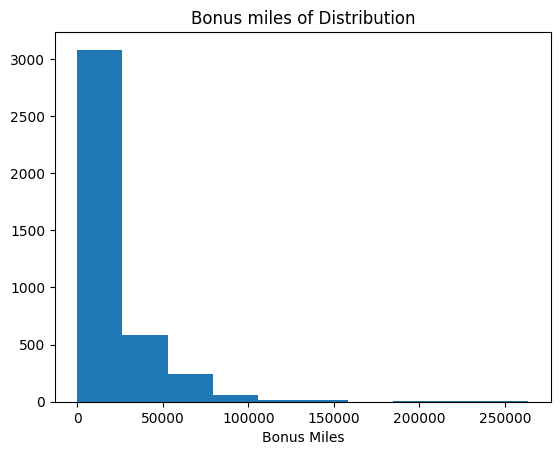

In [17]:
plt.title('Bonus miles of Distribution')
plt.xlabel('Bonus Miles')
plt.hist(data['Bonus_miles']);

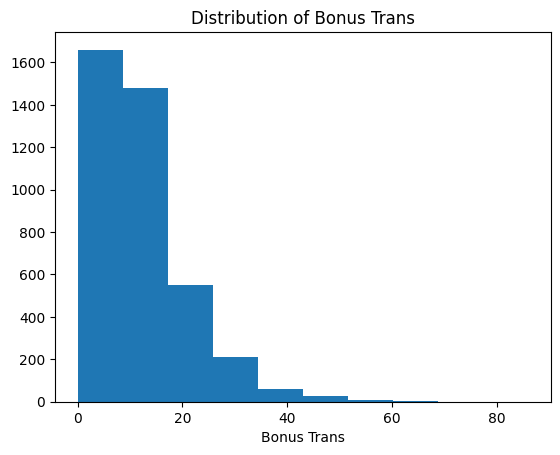

In [18]:
plt.title('Distribution of Bonus Trans')
plt.xlabel('Bonus Trans')
plt.hist(data['Bonus_trans']);

Text(0.5, 0, 'Bonus Flight Miles 12mo')

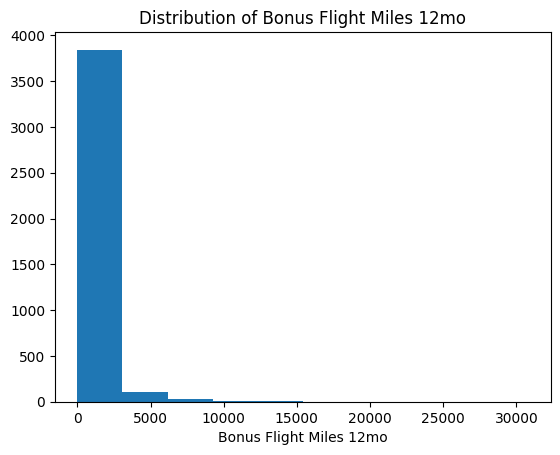

In [19]:
plt.hist(data['Flight_miles_12mo']);
plt.title('Distribution of Bonus Flight Miles 12mo')
plt.xlabel('Bonus Flight Miles 12mo')

Text(0.5, 0, 'Flight trans 12')

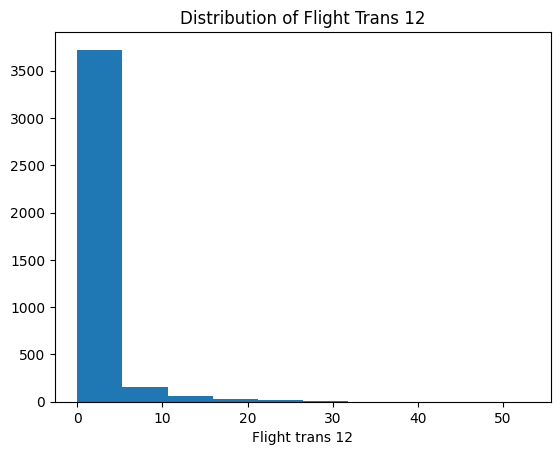

In [20]:
plt.hist(data['Flight_trans_12']);
plt.title('Distribution of Flight Trans 12')
plt.xlabel('Flight trans 12')

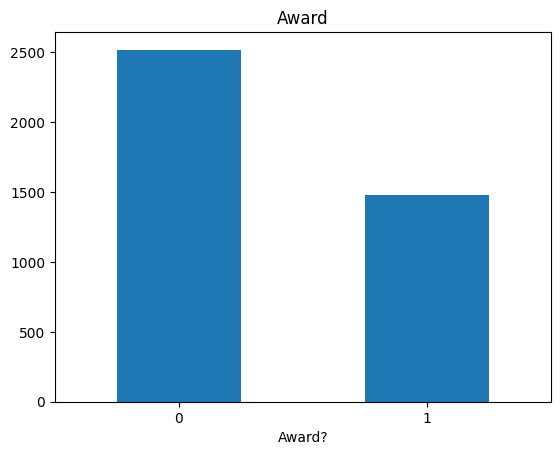

In [21]:
data['Award?'].value_counts().sort_index().plot(kind='bar')
plt.title('Award')
plt.xticks(rotation=0);

<Axes: >

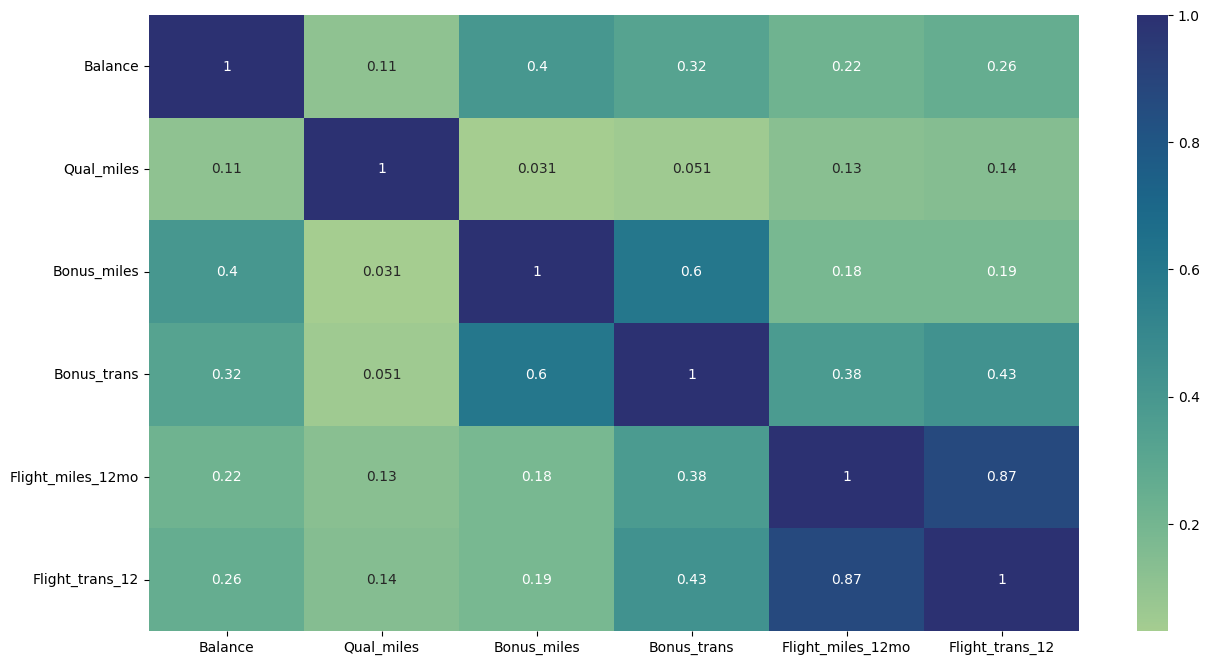

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['ID#','cc1_miles','cc2_miles','cc3_miles','Days_since_enroll','Award?'],axis = 1).corr() , annot = True, cmap = 'crest')

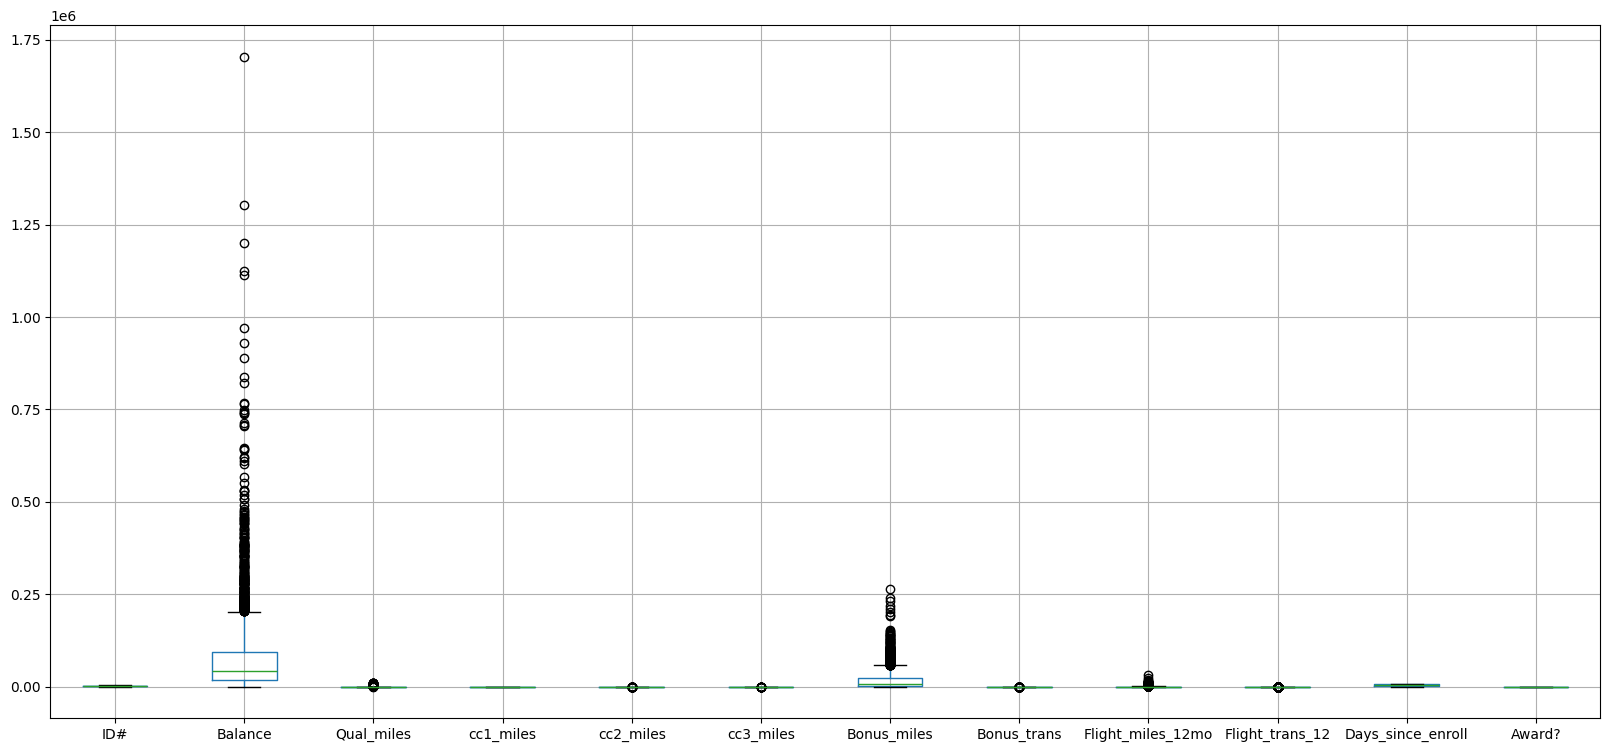

In [23]:
plt.figure(figsize=(20,9))
data.boxplot()
plt.show()

In [24]:
data.drop('ID#',inplace = True,axis = 1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


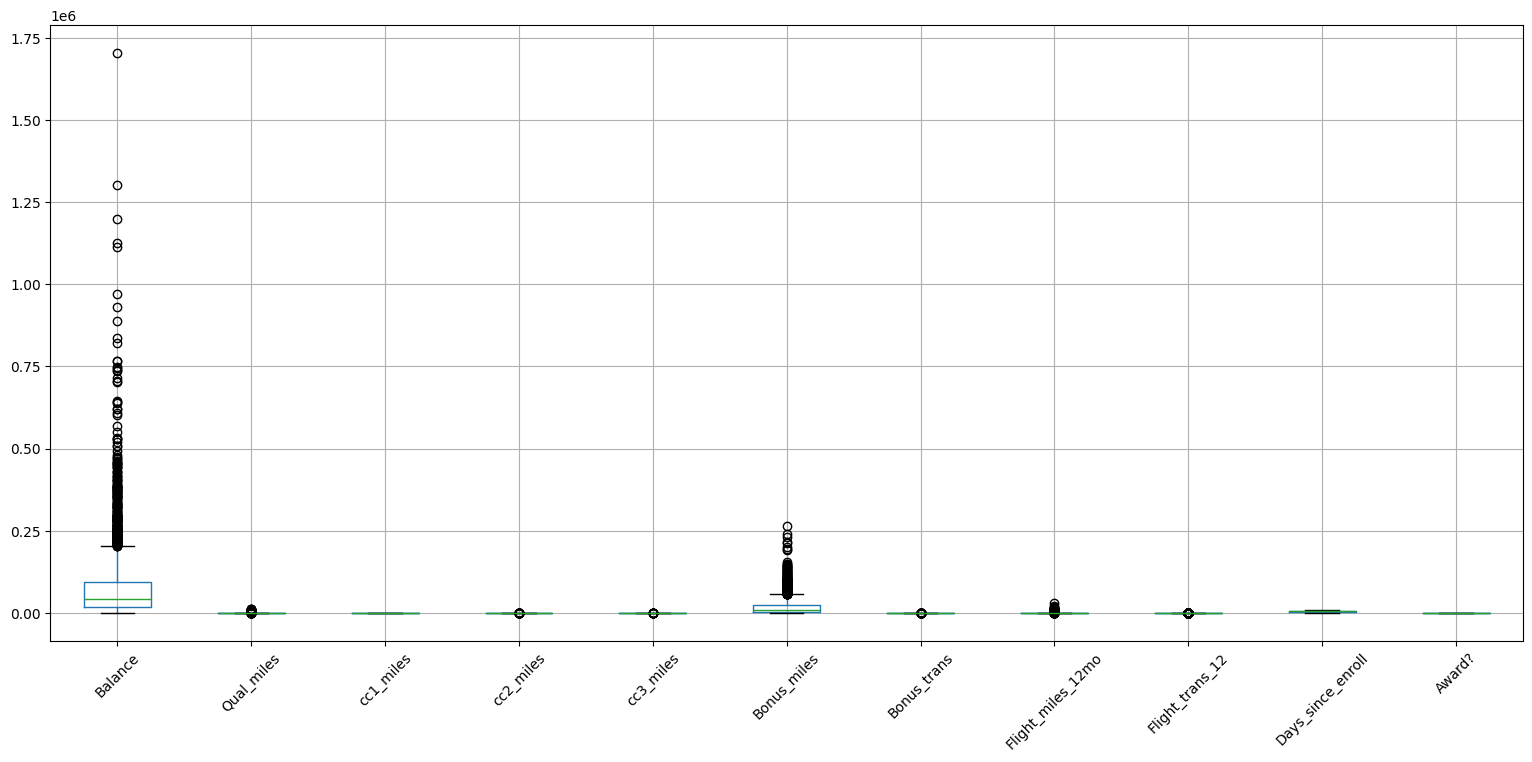

In [25]:
plt.figure(figsize=(19, 8))
data.boxplot()
plt.xticks(rotation=45)
plt.show()


In [26]:
def capping(data,columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (IQR * 1.5)
        lower_bound = Q1 - (IQR * 1.5)
        data[i] = data[i].clip(upper = upper_bound, lower = lower_bound)

In [27]:
print(pd.DataFrame({'Column': data.columns, 'Unique Values': data.nunique().values}))


               Column  Unique Values
0             Balance           3904
1          Qual_miles            164
2           cc1_miles              5
3           cc2_miles              3
4           cc3_miles              5
5         Bonus_miles           2734
6         Bonus_trans             57
7   Flight_miles_12mo            343
8     Flight_trans_12             35
9   Days_since_enroll           2820
10             Award?              2


In [28]:
capping(data,data.drop(['Flight_trans_12','Flight_miles_12mo','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Award?'],axis = 1))

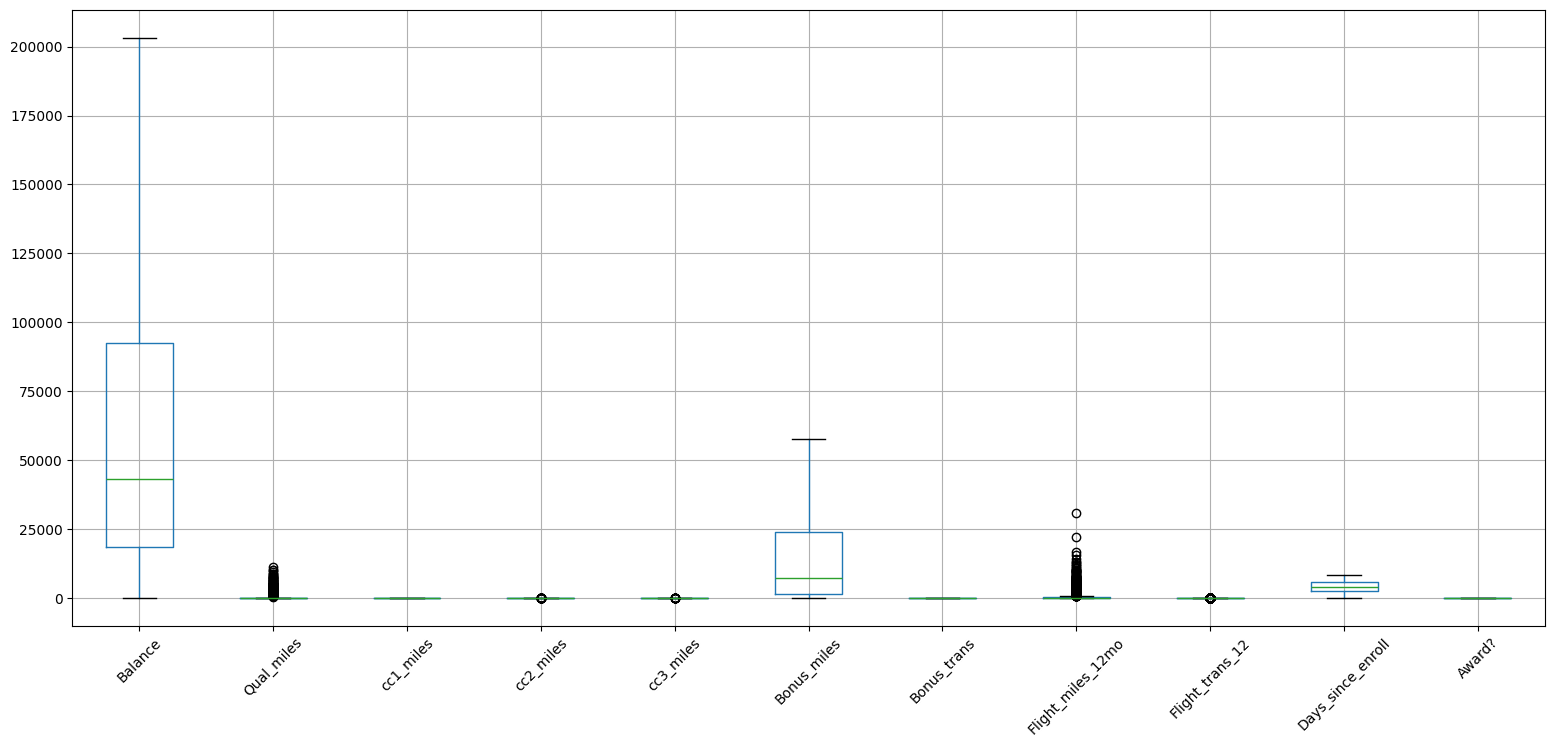

In [29]:
plt.figure(figsize=(19, 8))
data.boxplot()
plt.xticks(rotation=45)
plt.show()


In [30]:
for col, count in data.nunique().items():
    print(f'Unique values of {col} are {count}')


Unique values of Balance are 3639
Unique values of Qual_miles are 164
Unique values of cc1_miles are 5
Unique values of cc2_miles are 3
Unique values of cc3_miles are 5
Unique values of Bonus_miles are 2458
Unique values of Bonus_trans are 39
Unique values of Flight_miles_12mo are 343
Unique values of Flight_trans_12 are 35
Unique values of Days_since_enroll are 2820
Unique values of Award? are 2


In [31]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0,1,1,1,174.0,1,0,0,7000,0
1,19244.0,0,1,1,1,215.0,2,0,0,6968,0
2,41354.0,0,1,1,1,4123.0,4,0,0,7034,0
3,14776.0,0,1,1,1,500.0,1,0,0,6952,0
4,97752.0,0,4,1,1,43300.0,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4,200,1,1403,1
3995,64385.0,0,1,1,1,981.0,5,0,0,1395,1
3996,73597.0,0,3,1,1,25447.0,8,0,0,1402,1
3997,54899.0,0,1,1,1,500.0,1,500,1,1401,0


In [32]:
exclude_cols = ['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?', 'Days_since_enroll']
sc_columns = [col for col in data.columns if col not in exclude_cols]

sc = StandardScaler()
data[sc_columns] = sc.fit_transform(data[sc_columns])


In [33]:
data.drop('Days_since_enroll', axis = 1, inplace = True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?
0,-0.607258,-0.186299,1,1,1,-0.843091,-1.148854,-0.328603,-0.362168,0
1,-0.758947,-0.186299,1,1,1,-0.840822,-1.039133,-0.328603,-0.362168,0
2,-0.382070,-0.186299,1,1,1,-0.624581,-0.819689,-0.328603,-0.362168,0
3,-0.835106,-0.186299,1,1,1,-0.825052,-1.148854,-0.328603,-0.362168,0
4,0.579265,-0.186299,4,1,1,1.543191,1.594189,1.154932,0.692490,1
...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,1,1,1,-0.381007,-0.819689,-0.185750,-0.098503,1
3995,0.010506,-0.186299,1,1,1,-0.798437,-0.709967,-0.328603,-0.362168,1
3996,0.167530,-0.186299,3,1,1,0.555335,-0.380802,-0.328603,-0.362168,1
3997,-0.151188,-0.186299,1,1,1,-0.825052,-1.148854,0.028531,-0.098503,0


In [34]:
selector = VarianceThreshold(threshold=0.6)
X_new = selector.fit_transform(data)

selected_features = data.columns[selector.get_support()]

print("Selected features based on variance threshold:")
print(selected_features.tolist())

Selected features based on variance threshold:
['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']


In [35]:
link = linkage(data[selected_features], method = 'ward')

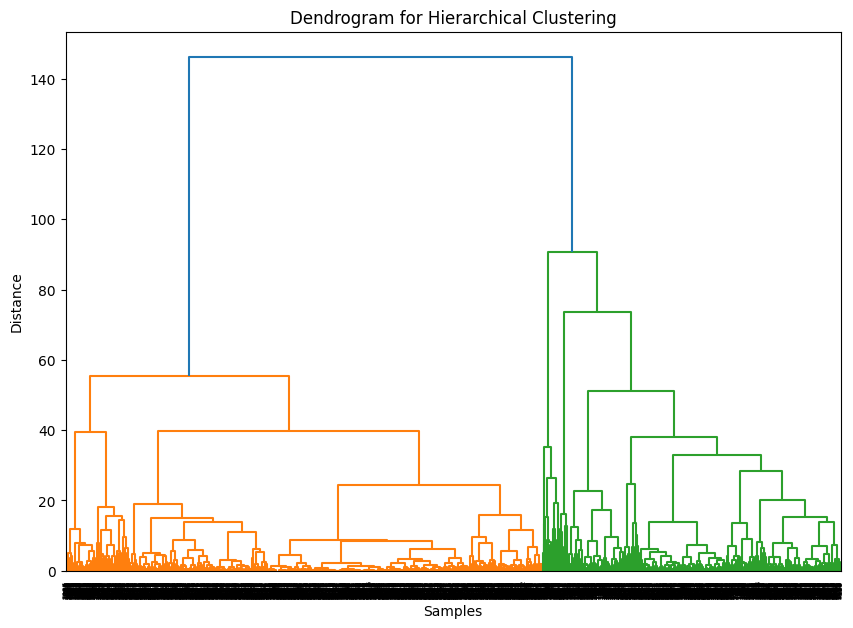

In [36]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(link)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [37]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
data['Ward_Cluster'] = model.fit_predict(data[selected_features])
data


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?,Ward_Cluster
0,-0.607258,-0.186299,1,1,1,-0.843091,-1.148854,-0.328603,-0.362168,0,1
1,-0.758947,-0.186299,1,1,1,-0.840822,-1.039133,-0.328603,-0.362168,0,1
2,-0.382070,-0.186299,1,1,1,-0.624581,-0.819689,-0.328603,-0.362168,0,1
3,-0.835106,-0.186299,1,1,1,-0.825052,-1.148854,-0.328603,-0.362168,0,1
4,0.579265,-0.186299,4,1,1,1.543191,1.594189,1.154932,0.692490,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,1,1,1,-0.381007,-0.819689,-0.185750,-0.098503,1,1
3995,0.010506,-0.186299,1,1,1,-0.798437,-0.709967,-0.328603,-0.362168,1,1
3996,0.167530,-0.186299,3,1,1,0.555335,-0.380802,-0.328603,-0.362168,1,0
3997,-0.151188,-0.186299,1,1,1,-0.825052,-1.148854,0.028531,-0.098503,0,1


In [38]:
score = silhouette_score(data[selected_features], data['Ward_Cluster'])

In [39]:
print("silhouetee_score: ", score)

silhouetee_score:  0.4369857236012968


In [40]:
link1 = linkage(data[selected_features], method='average')

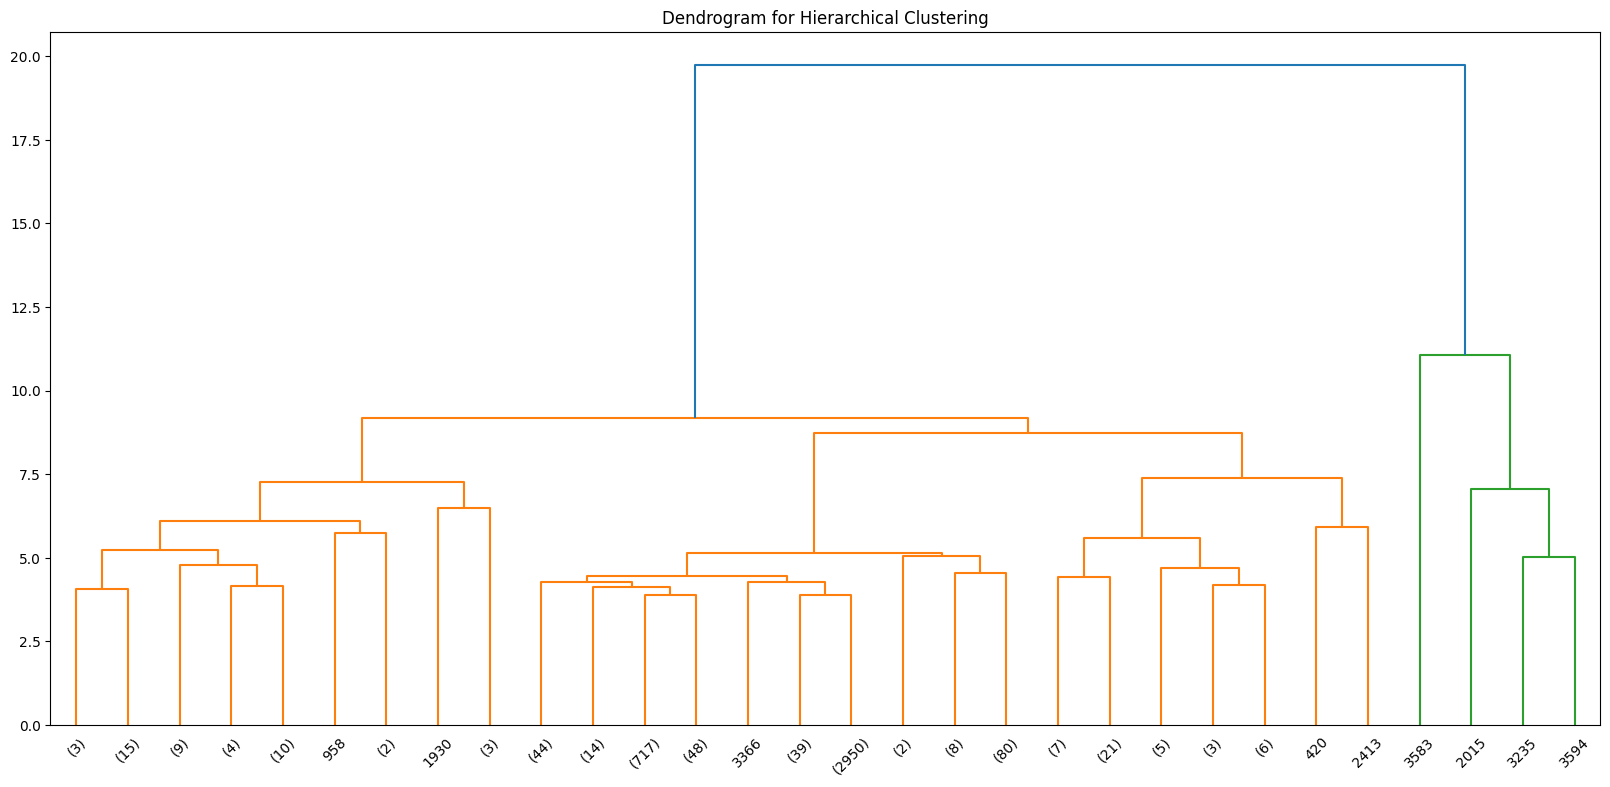

In [42]:
plt.figure(figsize=(20, 9))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(link1,truncate_mode='lastp');

In [43]:
model1 = AgglomerativeClustering(n_clusters=2, linkage='average')
data['Avg_Cluster'] = model1.fit_predict(data[selected_features])

In [44]:
score = silhouette_score(data[selected_features], data['Avg_Cluster'])

In [45]:
print("silhouetee_score: ", score)

silhouetee_score:  0.8310271659600628


In [46]:
data['Avg_Cluster'].value_counts()

,count
Avg_Cluster,
1,3995
0,4


In [47]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?,Ward_Cluster,Avg_Cluster
0,-0.607258,-0.186299,1,1,1,-0.843091,-1.148854,-0.328603,-0.362168,0,1,1
1,-0.758947,-0.186299,1,1,1,-0.840822,-1.039133,-0.328603,-0.362168,0,1,1
2,-0.382070,-0.186299,1,1,1,-0.624581,-0.819689,-0.328603,-0.362168,0,1,1
3,-0.835106,-0.186299,1,1,1,-0.825052,-1.148854,-0.328603,-0.362168,0,1,1
4,0.579265,-0.186299,4,1,1,1.543191,1.594189,1.154932,0.692490,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,1,1,1,-0.381007,-0.819689,-0.185750,-0.098503,1,1,1
3995,0.010506,-0.186299,1,1,1,-0.798437,-0.709967,-0.328603,-0.362168,1,1,1
3996,0.167530,-0.186299,3,1,1,0.555335,-0.380802,-0.328603,-0.362168,1,0,1
3997,-0.151188,-0.186299,1,1,1,-0.825052,-1.148854,0.028531,-0.098503,0,1,1


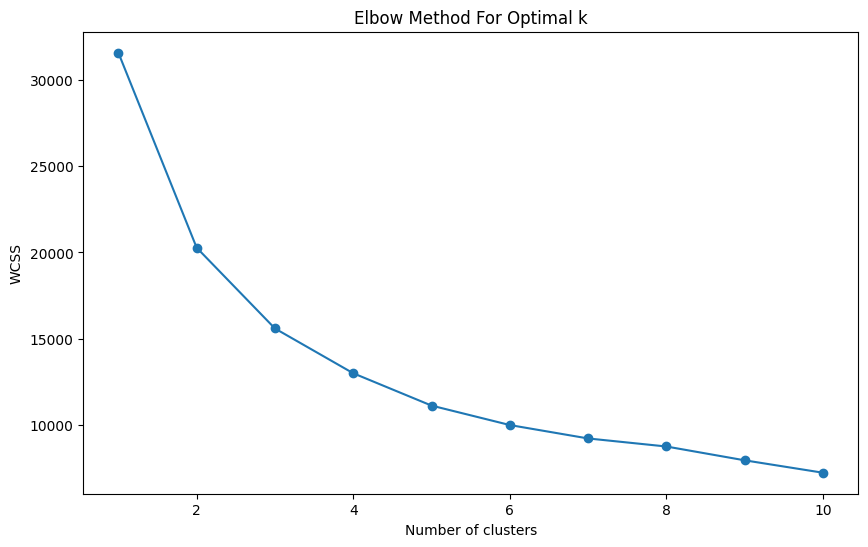

In [48]:
wcss = []
k = range(1, 11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[selected_features])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
k_means = KMeans(n_clusters=4, random_state=42)
data['K_means_Cluster'] = k_means.fit_predict(data[selected_features])

In [50]:
kmeans_silhouette = silhouette_score(data[selected_features], data['K_means_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.48121361027396947


In [51]:
dbscan = DBSCAN(eps=0.5, min_samples=14)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[selected_features])

In [52]:
labels = data['DBSCAN_Cluster']
mask = labels != -1
dbscan_silhouette = silhouette_score(data[selected_features][mask], labels[mask])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

DBSCAN Silhouette Score: 0.3535
